In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

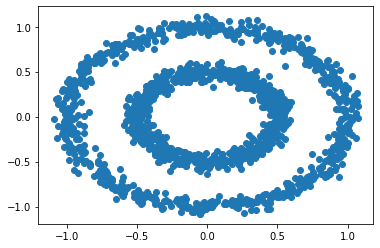

In [3]:
from sklearn import datasets

n_samples = 1500
data_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)[0]
plt.scatter(data_circles[:,0], data_circles[:,1])
plt.show()

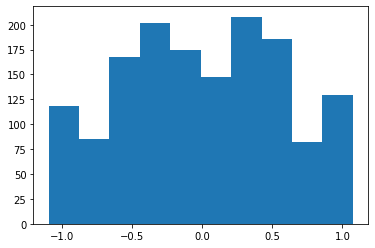

In [4]:
plt.hist(data_circles[:,0]); plt.show()

### Load data

In [5]:
data = pd.read_csv("./wholesale_customers_data.csv")
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
type(data[['Milk']])

pandas.core.frame.DataFrame

In [9]:
type(data['Milk'])

pandas.core.series.Series

## Outliers

In [10]:
data_skew = [(col_name, col_data.skew()) for col_name, col_data in data.iteritems()]
pd.DataFrame(data_skew, columns=['Feature', 'Skew']) \
    .style.hide_index() \
    .background_gradient(cmap='Reds')

Feature,Skew
Channel,0.760951
Region,-1.283627
Fresh,2.561323
Milk,4.053755
Grocery,3.587429
Frozen,5.907986
Detergents_Paper,3.631851
Delicassen,11.151586


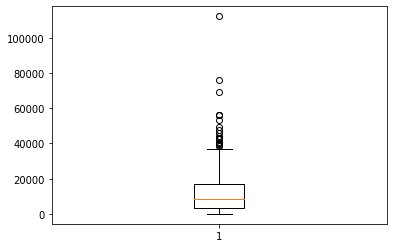

In [11]:
plt.boxplot(data['Fresh']); plt.show()

In [12]:
def drop_outliers_3std_max(df, feature):
    """drop outliers outside +3 * std dev"""
    max_value = df[feature].mean() + (3 * df[feature].std())
    df = df[df[feature] <= max_value]
    return df

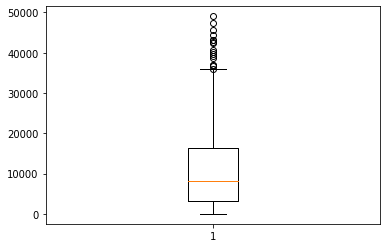

In [13]:
data = drop_outliers_3std_max(data, 'Fresh')
plt.boxplot(data['Fresh']); plt.show()

In [14]:
data = drop_outliers_3std_max(data, 'Milk')
data = drop_outliers_3std_max(data, 'Grocery')
data = drop_outliers_3std_max(data, 'Frozen')
data = drop_outliers_3std_max(data, 'Detergents_Paper')
data = drop_outliers_3std_max(data, 'Delicassen')

In [15]:
data_skew = [(col_name, col_data.skew()) for col_name, col_data in data.iteritems()]
pd.DataFrame(data_skew, columns=['Feature', 'Skew']) \
    .style.hide_index() \
    .background_gradient(cmap='Reds')

Feature,Skew
Channel,0.940551
Region,-1.325782
Fresh,1.341536
Milk,1.678271
Grocery,1.451901
Frozen,2.011400
Detergents_Paper,1.472151
Delicassen,1.692311


In [16]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.00000,396.000000,396.000000
mean,1.287879,2.555556,10867.648990,4529.628788,6178.217172,2553.50000,1993.757576,1176.411616
std,0.453347,0.766015,9898.704567,4127.472099,5570.107687,2876.27886,2520.657749,1082.264178
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.00000,3.000000,3.000000
25%,1.000000,2.000000,3082.000000,1445.000000,2065.750000,672.00000,241.750000,391.000000
50%,1.000000,3.000000,8180.000000,3251.000000,4099.500000,1447.00000,708.000000,836.000000
75%,2.000000,3.000000,16180.000000,6338.500000,8928.500000,3244.50000,3335.250000,1629.500000
max,2.000000,3.000000,49063.000000,23527.000000,28986.000000,15601.00000,11577.000000,5864.000000


In [17]:
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098
10,2,3,3366,5403,12974,4400,5977,1744


In [18]:
data['Channel'].value_counts()

1    282
2    114
Name: Channel, dtype: int64

In [19]:
data['Region'].value_counts()

3    287
1     67
2     42
Name: Region, dtype: int64

In [20]:
data.to_csv('02-data.csv', index=False)

## Normalize

In [20]:
# min-max
normalized_data = (data - data.min()) / (data.max() - data.min())
normalized_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.258174,0.409041,0.260774,0.012134,0.230776,0.227777
1,1.0,1.0,0.143783,0.415602,0.330021,0.111518,0.284258,0.302508
3,0.0,1.0,0.270322,0.048611,0.145534,0.409540,0.043546,0.304556
4,1.0,1.0,0.460905,0.228144,0.248249,0.249743,0.153275,0.884149
5,1.0,1.0,0.191806,0.349523,0.176759,0.041153,0.154830,0.247057
6,1.0,1.0,0.247106,0.133947,0.240555,0.029212,0.271039,0.092476
7,1.0,1.0,0.154423,0.208802,0.325122,0.105547,0.286677,0.437297
8,0.0,1.0,0.121484,0.153076,0.213539,0.025681,0.148004,0.127453
9,1.0,1.0,0.122360,0.470262,0.651347,0.072804,0.641265,0.357448
10,1.0,1.0,0.068549,0.227846,0.447538,0.280881,0.516157,0.297048


In [21]:
# or using sklearn
from sklearn.preprocessing import minmax_scale
minmax_scale(data[['Fresh']])[:5]

array([[0.25817366],
       [0.14378312],
       [0.27032205],
       [0.46090501],
       [0.19180595]])

In [22]:
data = normalized_data
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.258174,0.409041,0.260774,0.012134,0.230776,0.227777
1,1.0,1.0,0.143783,0.415602,0.330021,0.111518,0.284258,0.302508
3,0.0,1.0,0.270322,0.048611,0.145534,0.409540,0.043546,0.304556
4,1.0,1.0,0.460905,0.228144,0.248249,0.249743,0.153275,0.884149
5,1.0,1.0,0.191806,0.349523,0.176759,0.041153,0.154830,0.247057
6,1.0,1.0,0.247106,0.133947,0.240555,0.029212,0.271039,0.092476
7,1.0,1.0,0.154423,0.208802,0.325122,0.105547,0.286677,0.437297
8,0.0,1.0,0.121484,0.153076,0.213539,0.025681,0.148004,0.127453
9,1.0,1.0,0.122360,0.470262,0.651347,0.072804,0.641265,0.357448
10,1.0,1.0,0.068549,0.227846,0.447538,0.280881,0.516157,0.297048


In [24]:
# data.to_csv('02-data-wholesale.csv', index=False)

## k-means

In [78]:
from sklearn.cluster import KMeans

# search for ideal k, no more than 20
ideal_k = []
for i in range(1,21):
    est_kmeans = KMeans(n_clusters=i)
    est_kmeans.fit(data_circles)

    # inertia_:
    # Sum of squared distances of samples to their closest cluster center.
    ideal_k.append([i, est_kmeans.inertia_])

ideal_k = np.array(ideal_k)
ideal_k

array([[  1.        , 944.08453768],
       [  2.        , 598.32438974],
       [  3.        , 364.41805162],
       [  4.        , 256.71258921],
       [  5.        , 202.25765525],
       [  6.        , 171.5486238 ],
       [  7.        , 151.92163947],
       [  8.        , 135.60135671],
       [  9.        , 117.62836659],
       [ 10.        , 104.07289683],
       [ 11.        ,  87.73735779],
       [ 12.        ,  74.75237385],
       [ 13.        ,  64.10449921],
       [ 14.        ,  56.36490966],
       [ 15.        ,  49.44053752],
       [ 16.        ,  44.09241212],
       [ 17.        ,  39.70706181],
       [ 18.        ,  35.66606434],
       [ 19.        ,  32.79047746],
       [ 20.        ,  29.70060914]])

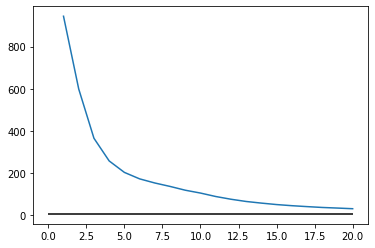

In [86]:
plt.plot(ideal_k[:,0], ideal_k[:,1])
plt.hlines([5], 0, 20)
plt.show()

In [91]:
# use ideal_k = 5
est_kmeans = KMeans(n_clusters=5)
est_kmeans.fit(data_circles)
pred_kmeans = est_kmeans.predict(data_circles)
pred_kmeans

array([0, 4, 4, ..., 3, 3, 0], dtype=int32)

In [98]:
np.array(np.unique(np.array(pred_kmeans), return_counts=True)).T

array([[  0, 297],
       [  1, 305],
       [  2, 300],
       [  3, 296],
       [  4, 302]])

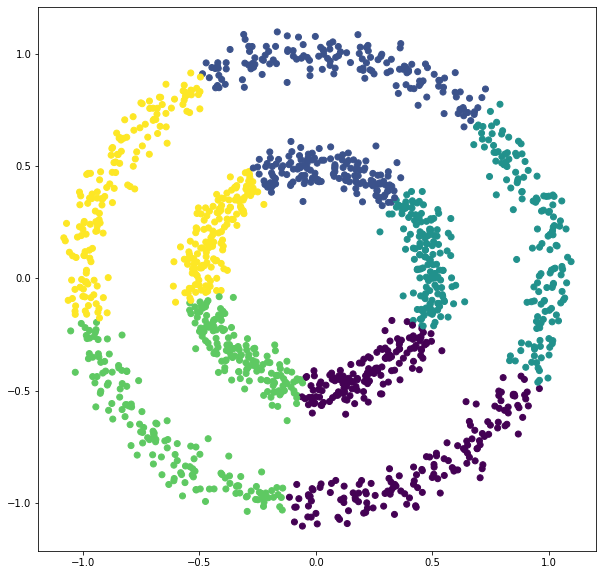

In [104]:
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(data_circles[:,0], data_circles[:,1], c=pred_kmeans)
plt.show()